In [3]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
digits = datasets.load_digits()

digits.images [[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5.

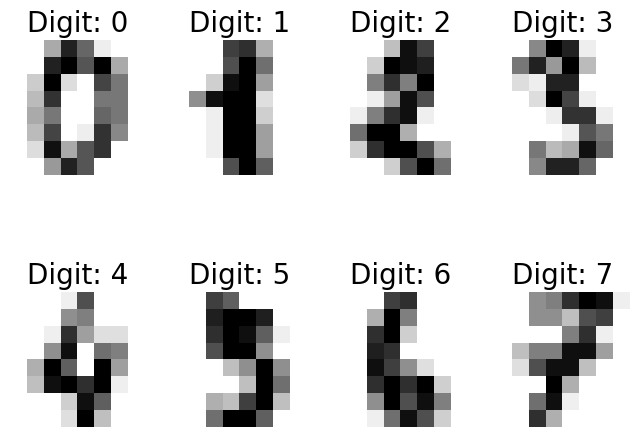

In [4]:
# 把数据所代表的图片显示出来
print('digits.images', digits.images)
print('digits.target', digits.target)
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(8, 6))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit: %i' % label, fontsize=20)
plt.show()

In [5]:
print("shape of raw image data: {0}".format(digits.images.shape))
print("shape of data: {0}".format(digits.data.shape))

"""out
shape of raw image data: (1797, 8, 8)
shape of data: (1797, 64)
"""

shape of raw image data: (1797, 8, 8)
shape of data: (1797, 64)


'out\nshape of raw image data: (1797, 8, 8)\nshape of data: (1797, 64)\n'

In [6]:
# 把数据分成训练数据集和测试数据集
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(digits.data,
                                                digits.target, test_size=0.20, random_state=2)

In [7]:
# 使用支持向量机来训练模型
from sklearn import svm

clf = svm.SVC(gamma=0.001, C=100., probability=True)
clf.fit(Xtrain, Ytrain)

,C,100.0
,kernel,'rbf'
,degree,3
,gamma,0.001
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [8]:
# 评估模型的准确度
from sklearn.metrics import accuracy_score

Ypred = clf.predict(Xtest)
accuracy_score(Ytest, Ypred)

clf.score(Xtest, Ytest)


0.9777777777777777

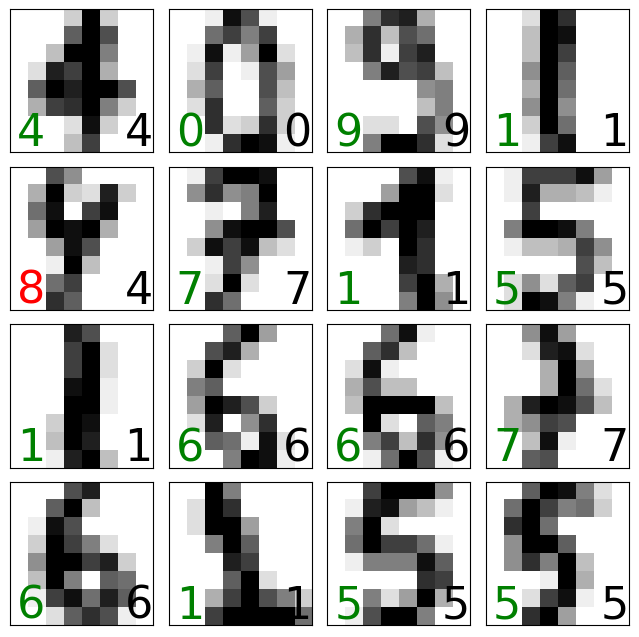

In [9]:
# 查看预测的情况
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.text(0.05, 0.05, str(Ypred[i]), fontsize=32,
            transform=ax.transAxes,
            color='green' if Ypred[i] == Ytest[i] else 'red')
    ax.text(0.8, 0.05, str(Ytest[i]), fontsize=32,
            transform=ax.transAxes,
            color='black')
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [10]:
# 保存模型参数
import joblib

joblib.dump(clf, 'digits_svm.pkl')

['digits_svm.pkl']

In [11]:
# 导入模型参数，直接进行预测
import joblib
clf = joblib.load('test-pkl/digits_svm.pkl')
Ypred = clf.predict(Xtest)
clf.score(Xtest, Ytest)

0.9777777777777777